

Deep learning solutions for: 
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset


Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb 
- https://developers.google.com/machine-learning/guides/text-classification/
- https://keras.io/api/datasets/boston_housing/


## Setup

In [8]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_test.size

25000

### Building your model

#### Model definition

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [9]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [10]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [11]:
history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                     validation_data=(x_val, y_val ) )

Epoch 1/20
30/30 [==============================] - 7s 57ms/step - loss: 0.5235 - accuracy: 0.7801 - val_loss: 0.3960 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3166 - accuracy: 0.8976 - val_loss: 0.3081 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2369 - accuracy: 0.9213 - val_loss: 0.2802 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1908 - accuracy: 0.9345 - val_loss: 0.3237 - val_accuracy: 0.8679
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1628 - accuracy: 0.9453 - val_loss: 0.2805 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1349 - accuracy: 0.9579 - val_loss: 0.2855 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1186 - accuracy: 0.9615 - val_loss: 0.3017 - val_accuracy: 0.8861
Epoch 8/20
30

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

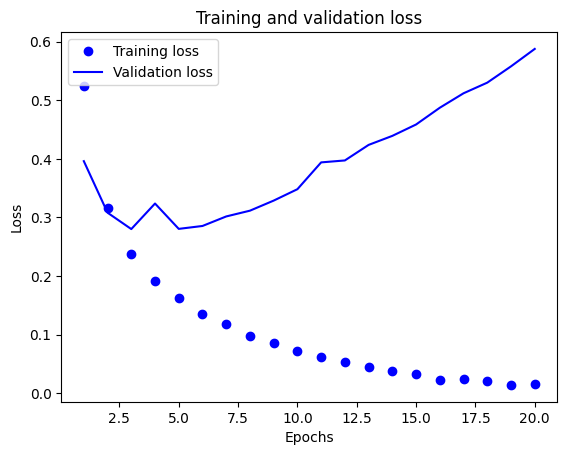

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

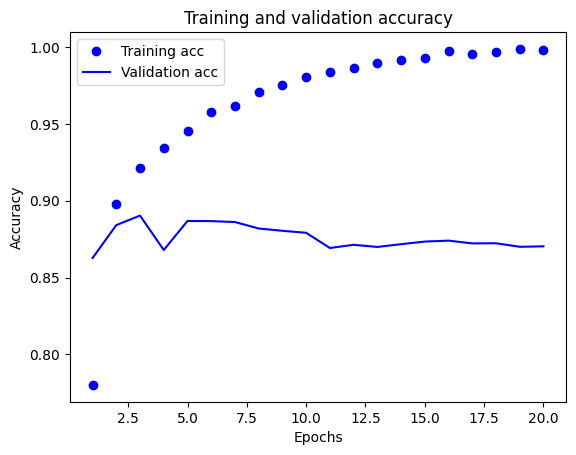

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model

In [15]:
results = model1.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.6306 - accuracy: 0.8585


In [ ]:
results

[0.6242935061454773, 0.8557199835777283]

 **1.1.1** 
 
   >What type of preprocessing was applied to the raw input data? Why was 
it necessary to do so?

The vectorize_sequences function is used to preprocess the data by vectorizing the sequences. The preprocessing step known as vectorization, which converts text data into numerical representations that will
be fed into machine learning models.
Using a list of sequences (in this case, movie reviews), the vectorize_sequences function creates a matrix representation of the sequences, with each row denoting a sequence and each column denoting a particular term or feature. The function represents the presence or absence of words in each sequence using one-hot encoding.
Each sequence is turned into a binary vector by this function, where a 1 denotes the presence of a word at a certain index and a 0 denotes its absence.

Why was  it necessary to do so?

1.  One of the numerous machine learning models that require numerical input is neural networks. The information is vectorized into a numerical form that these models can easily process.
2.  Data that is category or text-based can be vectorized to produce a clear and useful numerical representation. Instead of using large categorical variables or text strings, each element in the sequence is represented by a binary feature, which is memory-efficient and speeds up computations.
1.  The vectorized data can easily be enhanced with additional numerical features in order to more correctly reflect and recognise more significant patterns.
2.  Vectorizing the data makes it simpler to manage and process. Faster data preprocessing and model training are made possible by the efficient storage, transmission, and manipulation of vectorized data.

1.  When data is vectorized, the original data's information is preserved. The model can still distinguish between distinct components or words in the sequence since each element is represented as a binary feature.



 **1.1.2** 
 > Does your model suffer from overfitting? If so, what would you suggest 
doing about it?

Yes,this model suffer from overfitting,Based on loss and accuracy metrics during training for both the training and validation sets, we can see below point to find the model overfitting.
1. Overfitting is present if the training loss keeps decreasing while the validation loss starts to rise or remains high.
2. Indicators of overfitting include a steady increase in training accuracy and a stagnation or decline in validation accuracy.

would advise attempting the following strategies

1.  Having a larger dataset can assist prevent overfitting by giving the model access to a wider variety of samples. Utilising methods like data augmentation or collecting extra data may be advantageous.
2.  Decreasing the number of layers, units, or features to make the model less complex. Consequently, the model may be better able to generalise to fresh data.
2. A method for assessing the model's performance on various subsets of data is cross-validation. By evaluating the model's performance on hypothetical data, it is possible to determine whether the model is overfitting.
2. An imbalance or bias in the training data might occasionally cause overfitting. A more generalised representation of the underlying patterns can be learned by the model by gathering more varied and representative data.


 **1.1.3** 
 > Is accuracy a good metric of success in this case? Why (not)?
 
For evaluating binary classification on the IMDB dataset, which consists of movie reviews flagged as positive or bad, accuracy can be a reasonable statistic. Usually, the dataset is balanced, meaning that it has about the same amounts of good and negative ratings. In these circumstances, accuracy can offer a useful evaluation of the model's performance.
With almost equal amounts of good and negative evaluations, the IMDB dataset is often balanced. This situation allows accuracy to capture the overall correct classification rate, giving a clear indication of the model's effectiveness.
showing the percentage of reviews that were successfully classified out of all reviews. It offers a clear and straightforward knowledge of how effectively the model is working.

To have a fuller picture of the model's performance,better to take additional evaluation measures.

1. The percentage of events that were accurately predicted as positive out of all instances that were projected as positive is known as precision. It is helpful when minimising false positives is crucial, such as when misclassifying a negative review as positive is undesirable.
1. The proportion of accurately anticipated positive cases out of all actual positive instances is measured by recall, also known as sensitivity or true positive rate. Even if it generates more false positives, it is beneficial when gathering as many good ratings as possible is essential.
2.   The F1 score, which is the harmonic mean of precision and recall, offers a balanced assessment that takes into account both measurements. It is especially helpful when striking a balance between memory and precision is required.
2. The model's capacity to discriminate between positive and negative instances across various classification thresholds is measured by the area under the receiver operating characteristic curve (AUC-ROC). It offers a thorough analysis of the model's performance at various decision thresholds.


**1.2.1**

> Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [16]:
def decode_review(indices):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in indices])

positive_index = next((i for i, label in enumerate(train_labels) if label == 1))
positive_review = decode_review(train_data[positive_index])
negative_index = next((i for i, label in enumerate(train_labels[16:]) if label == 0))
nagative_review = decode_review(train_data[negative_index])
print("Positive Review (Label: 1):")
print(positive_review)

print("Negative Review (Label: 0):")
print(nagative_review)




Positive Review (Label: 1):
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what 

**1.2.2**

> Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.


In [17]:
x_test_decoded = [decode_review(review) for review in test_data]
# Make predictions on the test data
y_pred = model1.predict(x_val)
#False positive with true and predicted labels
FP_index = next((i for i in range(len(test_labels)) if test_labels[i] == 0 and y_pred[i] >=1),None)
FP_review = x_test_decoded[FP_index]
FP_true_label = test_labels[FP_index]
FP_predicted_label = y_pred[FP_index]

print("False Positive:") 
print("Review:", FP_review) 
print("True Label:", FP_true_label)
print("Predicted Label:", FP_predicted_label)
print() 



313/313 [==============================] - 1s 2ms/step
False Positive:
Review: ? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we have night v

In [18]:
#False negative with true and predicted labels
x_test_decoded = [decode_review(review) for review in test_data]
FN_index = next((i for i in range(len(test_labels)) if test_labels[i] == 1 and y_pred[i] <0.5),None)
FN_review = x_test_decoded[FN_index] 
FN_true_label = test_labels[FN_index]
FN_predicted_label = y_pred[FN_index]

print("False negative:") 
print("Review:", FN_review) 
print("True Label:", FN_true_label) 
print("Predicted Label:", FN_predicted_label) 
print()


False negative:
Review: ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atm

**1.2.3**
>Comment on the mistakes and what you believe might have caused each of them.

**False Possitive**

1. Contextual Understanding: Because of the review's sophisticated language, the model might have trouble capturing the negative attitude represented there. Phrases like "terrible performances," "flat, flat, flat," and "wasn't going to work out" are present because they convey a negative attitude, which the model was unable to detect.
1. The usage of phrases or idioms that are not frequently associated with negative emotion may have an impact on the misclassification. The adage "give this one a miss" is a warning to avoid something since it is frequently associated with negative emotions, even though the model may not have fully integrated this link.
2. It's possible that the classifier made its decision with insufficient context from the review. It might have focussed on a few words or phrases without considering the complete sentiment or context offered in the entire text.
2. The model could be unable to fully represent the nuanced connections between words, phrases, and sentiment.


**False Negative**

1.  It's possible that this review does not use overtly sentimental terms or phrases that are frequently found in positive evaluations. Despite praising certain sections of the movie and highlighting its positive aspects, the classification might be incorrect because there aren't any significant emotion indicators.
1. Due to the review's complex sentence structures, a few terms that are either missing or misunderstood and cause classification mistakes, as well as a few other factors, it may be challenging for the model to effectively reflect the review's overall positive mood.
2. The review has unclear statements or expressions that various readers may interpret in different ways. Due to the sophisticated language used in the review, the model might have trouble identifying favourable emotions.
2. It's likely that the model is unable to properly understand the text's nuance and context. The favourable message that was conveyed by the reviewer's tone and emphasis on particular elements of the film might not be accurately portrayed.


**1.2.4**

> Write code to try different combinations of:
- numbers of hidden layers and units per layer 
- loss functions
- activation functions

> Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

Number of Layer and units per hidden layer are changed 

*  Advance techniques BatchNormalization and Dropout were added.
*  Activation Function  tanh



In [66]:
from keras import regularizers
model11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2), 
    #layers.LSTM(32, activation="relu", return_sequences=True),  # LSTM layer with return_sequences=True
    #layers.LSTM(16, activation="relu"),  # LSTM layer without return_sequences=True
    layers.Dense(1, activation="tanh")
])


In [69]:
model11.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [68]:
history1 = model11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                     validation_data=(x_val, y_val ) )

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.2474 - accuracy: 0.6935 - val_loss: 0.2458 - val_accuracy: 0.5274
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0966 - accuracy: 0.8825 - val_loss: 0.1877 - val_accuracy: 0.6838
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0544 - accuracy: 0.9385 - val_loss: 0.1620 - val_accuracy: 0.7633
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0309 - accuracy: 0.9677 - val_loss: 0.1545 - val_accuracy: 0.7848
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0173 - accuracy: 0.9833 - val_loss: 0.1243 - val_accuracy: 0.8350
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0097 - accuracy: 0.9921 - val_loss: 0.1544 - val_accuracy: 0.7993
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0069 - accuracy: 0.9942 - val_loss: 0.1269 - val_accuracy: 0.8327
Epoch 8/20
30

In [57]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

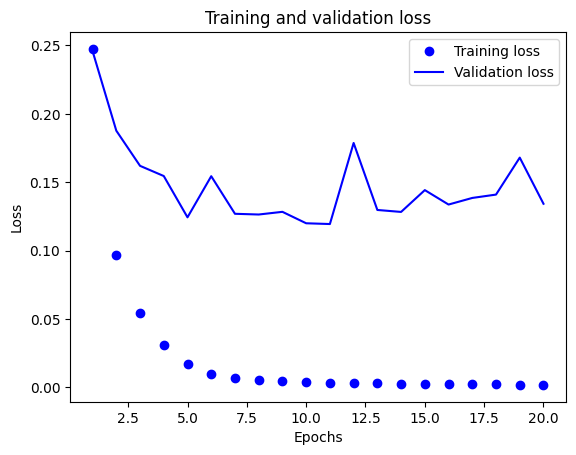

In [70]:
import matplotlib.pyplot as plt
history_dict1 = history1.history
loss_values = history_dict1["loss"]
val_loss_values = history_dict1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

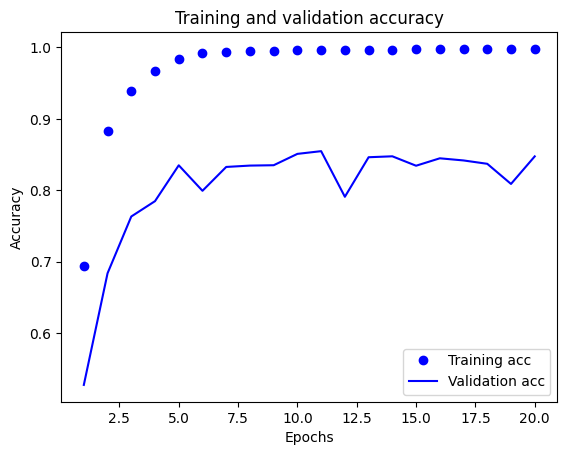

In [71]:
plt.clf()
acc = history_dict1["accuracy"]
val_acc = history_dict1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Multiclass classification of newswires using the Reuters dataset**

Once again, we will start with a simple solution using a fully-connected neural network architecture. 

### The Reuters dataset

#### Loading the Reuters dataset

In [60]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [61]:
len(train_data)

8982

In [62]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [63]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 1us/step


In [64]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [72]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [73]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [89]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)



### Building your model

#### Model definition

In [75]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [76]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [77]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [78]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 2.8253 - accuracy: 0.5104 - val_loss: 1.8666 - val_accuracy: 0.6040
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5762 - accuracy: 0.6809 - val_loss: 1.3800 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1981 - accuracy: 0.7424 - val_loss: 1.1831 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9753 - accuracy: 0.7939 - val_loss: 1.0913 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8114 - accuracy: 0.8251 - val_loss: 1.0282 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6827 - accuracy: 0.8517 - val_loss: 0.9609 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5796 - accuracy: 0.8747 - val_loss: 0.9524 - val_accuracy: 0.7910
Epoch 8/20
16

#### Plotting the training and validation loss

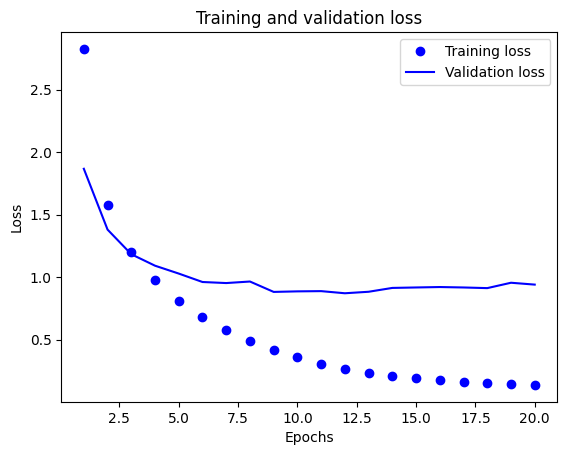

In [79]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

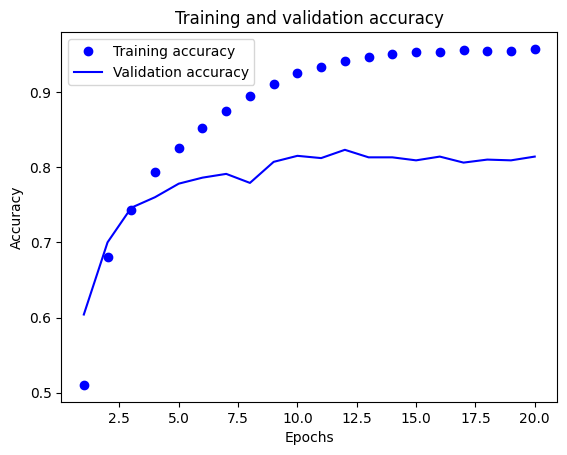

In [80]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model


In [81]:
results = model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.7934


In [ ]:
results

[1.039241909980774, 0.7938557267189026]

**2.1.1**

>What type of preprocessing was applied to the raw input data?

**Vectorization **

The vectorize_sequences function is used to preprocess the data by vectorizing the sequences. The preprocessing step known as vectorization, which converts text data into numerical representations that will
be fed into machine learning models.
Using a list of sequences (in this case, movie reviews), the vectorize_sequences function creates a matrix representation of the sequences, with each row denoting a sequence and each column denoting a particular term or feature. The function represents the presence or absence of words in each sequence using one-hot encoding.
Each sequence is turned into a binary vector by this function, where a 1 denotes the presence of a word at a certain index and a 0 denotes its absence.

Why was it necessary to do so?

1. One of the numerous machine learning models that require numerical input is neural networks. The information is vectorized into a numerical form that these models can easily process.
2. Data that is category or text-based can be vectorized to produce a clear and useful numerical representation. Instead of using large categorical variables or text strings, each element in the sequence is represented by a binary feature, which is memory-efficient and speeds up computations.
3. The vectorized data can easily be enhanced with additional numerical features in order to more correctly reflect and recognise more significant patterns.

4. Vectorizing the data makes it simpler to manage and process. Faster data preprocessing and model training are made possible by the efficient storage, transmission, and manipulation of vectorized data.

5. When data is vectorized, the original data's information is preserved. The model can still distinguish between distinct components or words in the sequence since each element is represented as a binary feature.


**one-hot encoding**

1. A technique for representing binary vectors of category variables or labels is known as one-hot encoding. It creates a binary representation of category variables for machine learning algorithms to use as input.
1. For categorical variables, one-hot encoding is advantageous because it enables machine learning algorithms to correctly comprehend and analyse categorical data. By treating each category as a unique feature, it avoids assigning any ordinal relationships between them.
2. One-hot encoding is widely used on the target variable (labels) in classification tasks, where the goal is to predict one of several predetermined classes. 

**2.1.2**

>How many categories are there in this case? 

In this scenario, there are a total of 46 categories.

In [95]:
category_labels = reuters.get_word_index()
category_names = {index: word for word, index in category_labels.items()}
print("Categories in the Routers dataset:")
for index in set(train_labels):
    print(f"{index}: {category_names.get(index)}")

Categories in the Routers dataset:
0: None
1: the
2: of
3: to
4: in
5: said
6: and
7: a
8: mln
9: 3
10: for
11: vs
12: dlrs
13: it
14: reuter
15: 000
16: 1
17: pct
18: on
19: from
20: is
21: that
22: its
23: cts
24: by
25: at
26: year
27: be
28: with
29: 2
30: will
31: was
32: billion
33: he
34: u
35: s
36: net
37: has
38: would
39: an
40: as
41: 5
42: not
43: loss
44: 4
45: 1986


**2.1.3**

>Does your model suffer from overfitting? If so, what would you suggest doing about it? 

Yes,this model suffer from overfitting,Based on loss and accuracy metrics during training for both the training and validation sets, we can see below point to find the model overfitting. 

1. Overfitting is present if the training loss keeps decreasing while the validation loss starts to rise or remains high
2.Indicators of overfitting include a steady increase in training accuracy and a stagnation or decline in validation accuracy.

We can avoid overfitting by following the below techniques


1. Having a larger dataset can assist prevent overfitting by giving the model access to a wider variety of samples. Utilising methods like data augmentation or collecting extra data may be advantageous
2.Decreasing the number of layers, units, or features to make the model less complex. Consequently, the model may be better able to generalise to fresh data.
1.A method for assessing the model's performance on various subsets of data is cross-validation. By evaluating the model's performance on hypothetical data, it is possible to determine whether the model is overfitting.
2. An imbalance or bias in the training data might occasionally cause overfitting. A more generalised representation of the underlying patterns can be learned by the model by gathering more varied and representative data.


**2.1.4**

>Is accuracy a good metric of success in this case? Why (not)?

If we are using "categorical_crossentropy" as the loss function, accuracy can provide you a general notion of how well your model is performing in terms of properly predicting the class labels in the context of multi-class classification. It calculates the percentage of all samples that have labels that were correctly anticipated.

Accuracy cannot demonstrate the model's performance in its entirety, especially when the dataset is uneven or the classes have different levels of importance. In certain situations, other evaluation metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC), may be more helpful.

Its better to take additional evaluation measures.

1. The percentage of events that were accurately predicted as positive out of all instances that were projected as positive is known as precision. It is helpful when minimising false positives is crucial, such as when misclassifying a negative review as positive is undesirable.
2. The proportion of accurately anticipated positive cases out of all actual positive instances is measured by recall, also known as sensitivity or true positive rate. Even if it generates more false positives, it is beneficial when gathering as many good ratings as possible is essential.
3. The F1 score, which is the harmonic mean of precision and recall, offers a balanced assessment that takes into account both measurements. It is especially helpful when striking a balance between memory and precision is required.
4. The model's capacity to discriminate between positive and negative instances across various classification thresholds is measured by the area under the receiver operating characteristic curve (AUC-ROC). It offers a thorough analysis of the model's performance at various decision thresholds.


 **2.2.1**

Write code to try different combinations of:
- numbers of hidden layers 
- units per layer 

> Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

Number of Layer and units per hidden layer are changed 

*  Advance techniques BatchNormalization and Dropout were added.
*  Activation Function  softmax


In [143]:
model21 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(46, activation="softmax")

  
])

In [145]:
model21.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [146]:
history21 = model21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
16/16 [==============================] - 3s 35ms/step - loss: 2.1769 - accuracy: 0.5643 - val_loss: 3.1682 - val_accuracy: 0.6960
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0729 - accuracy: 0.7841 - val_loss: 2.9191 - val_accuracy: 0.7380
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7233 - accuracy: 0.8485 - val_loss: 2.7713 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5128 - accuracy: 0.8921 - val_loss: 2.5561 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.3824 - accuracy: 0.9203 - val_loss: 2.3061 - val_accuracy: 0.7680
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.2925 - accuracy: 0.9366 - val_loss: 2.1068 - val_accuracy: 0.7680
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.2406 - accuracy: 0.9442 - val_loss: 1.8892 - val_accuracy: 0.7860
Epoch 8/20
16

In [123]:
model21.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0595 - accuracy: 0.7907


[1.0595364570617676, 0.790739119052887]

In [148]:
predictions = model21.predict(x_test)

71/71 [==============================] - 0s 2ms/step


### Generating predictions on new data

In [149]:
predictions[0].shape

(46,)

In [150]:
np.sum(predictions[0])

1.0000002

In [151]:
np.argmax(predictions[0])

3

## Regression for house price estimation using the Boston Housing Price dataset

### The Boston Housing Price dataset

**WARNING**: This dataset has an ethical problem: [the authors of this dataset included a variable, "B", that may appear to assume that racial self-segregation influences house prices](http://lib.stat.cmu.edu/datasets/boston). 

I've decided to keep it in this Project to provide an early concrete example of fairness, bias, and related ethical issues in data science, machine learning, deep learning, and AI.

#### Loading the Boston housing dataset

In [3]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [154]:
test_data.shape

(102, 13)

In [155]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [6]:
def build_model3():
    model3 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model3.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model3

### Validating your approach using K-fold validation

In [9]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    model3.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [159]:
all_scores

[1.993604302406311, 2.606920003890991, 2.489102363586426, 2.4988107681274414]

In [160]:
np.mean(all_scores)

2.3971093595027924

#### Saving the validation logs at each fold

In [10]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    history = model3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [11]:
print(mae_history)

[21.64710807800293, 18.114898681640625, 13.642609596252441, 9.176961898803711, 7.086854457855225, 5.771775245666504, 4.945427894592285, 4.3349151611328125, 4.017838478088379, 3.7992608547210693, 3.657264232635498, 3.4944748878479004, 3.3417038917541504, 3.24224591255188, 3.1627144813537598, 3.1658897399902344, 3.025177001953125, 2.9754128456115723, 2.8990678787231445, 2.8952436447143555, 2.9301116466522217, 2.8086161613464355, 2.8237006664276123, 2.760908603668213, 2.7374393939971924, 2.668027400970459, 2.6960980892181396, 2.628748893737793, 2.6304843425750732, 2.5820937156677246, 2.6475353240966797, 2.6492254734039307, 2.5347936153411865, 2.656071662902832, 2.510694980621338, 2.602806568145752, 2.5583090782165527, 2.5282342433929443, 2.455702066421509, 2.530050039291382, 2.5064897537231445, 2.443753719329834, 2.546186923980713, 2.474175214767456, 2.4234673976898193, 2.5404696464538574, 2.46455454826355, 2.5020105838775635, 2.5559780597686768, 2.4517180919647217, 2.4272513389587402, 2.

#### Building the history of successive mean K-fold validation scores

In [12]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

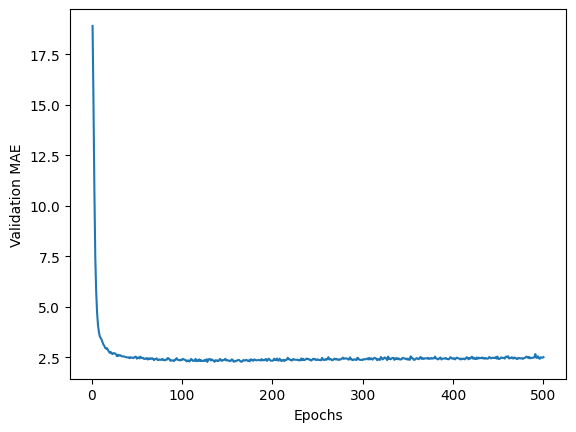

In [13]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

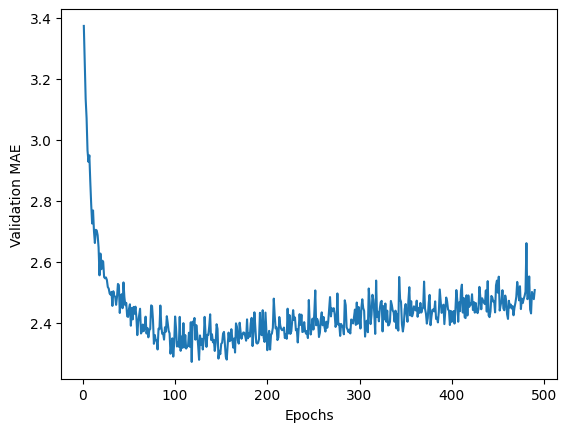

In [14]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [15]:
model3 = build_model3()
model3.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model3.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 18.3939 - mae: 2.8592


In [ ]:
test_mae_score

2.6882994174957275

### Generating predictions on new data

In [181]:
predictions = model3.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([6.8175917], dtype=float32)

### Fitting the model on validation data to verify the over fitting

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
k = 4
num_val_samples = len(test_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = test_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = test_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [test_data[:i * num_val_samples],
         test_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [test_targets[:i * num_val_samples],
         test_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model32 = build_model3()
    model32.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model32.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2


Processing fold #3


In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = test_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = test_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [test_data[:i * num_val_samples],
         test_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [test_targets[:i * num_val_samples],
         test_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model32 = build_model3()
    history = model32.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [19]:
print(mae_history)

[24.8315372467041, 24.253690719604492, 23.636930465698242, 22.950355529785156, 22.192153930664062, 21.381067276000977, 20.49380874633789, 19.49127769470215, 18.388046264648438, 17.331674575805664, 16.1475772857666, 14.853738784790039, 13.5879545211792, 12.423371315002441, 11.34454345703125, 10.271747589111328, 9.260022163391113, 8.379861831665039, 7.674560070037842, 7.183460712432861, 6.699117660522461, 6.410706996917725, 5.943909168243408, 5.615910053253174, 5.265432357788086, 5.033977031707764, 4.8606672286987305, 4.714987754821777, 4.596738815307617, 4.462482452392578, 4.356486797332764, 4.215907096862793, 4.127028942108154, 4.031863689422607, 3.9971184730529785, 3.887887477874756, 3.831747055053711, 3.7756640911102295, 3.738445520401001, 3.703230381011963, 3.7198784351348877, 3.738856792449951, 3.7242989540100098, 3.8242666721343994, 3.770941734313965, 3.840303421020508, 3.805908203125, 3.793809175491333, 3.7948508262634277, 3.837538480758667, 3.8482794761657715, 3.8685357570648193

In [24]:
average_mae_history1 = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

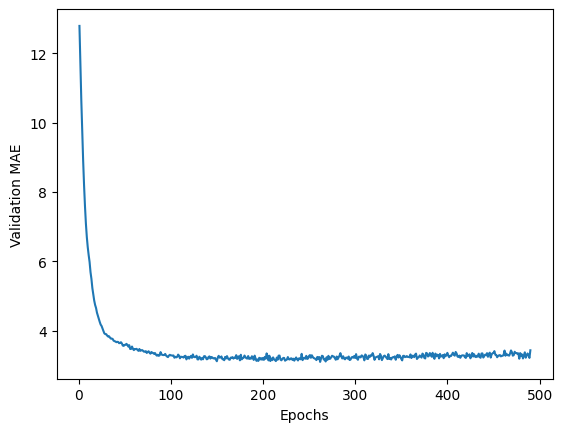

In [26]:
truncated_mae_history = average_mae_history1[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

 **3.1.1** 
 
   >What type of preprocessing was applied to the raw input data? Why was 
it necessary to do so?

**Data normalization**
Data normalization is a popular preprocessing step used in machine learning. It entails scaling the data to a given range or altering the data to have a zero mean and unit variance.

1. To ensure that the characteristics have a zero mean and a single standard deviation, data normalisation involves standardising the features. This normalisation method aids in enhancing the model's generalizability to new data and the training process.
2. Some features may influence the learning algorithm more than others when scaled or quantified in different ways. Normalising the data keeps any one feature from controlling the learning process by putting all features on an equal footing.
3.The features converge more quickly after being normalised. The convergence process can be sped up and the learning algorithm's effectiveness increased by normalising the input.
4.By normalising the data, the features can be made more comparable and treated equally by the learning system.
5.Scaling the features can result in more robust and trustworthy models by lowering the impact of outliers and extreme values.

 **3.1.2** 
 
   >Why is this problem a case of regression (rather than classification)?


1. Because the aim is to forecast a continuous numerical value rather than a defined class or category, the Boston Housing Price dataset is an example of regression rather than classification.
2. The median value of owner-occupied homes is predicted using factors from the Boston Housing Price dataset, including the crime rate, the typical number of rooms per dwelling, and others.
3. The objective variable, a continuous variable that can take on any value within a range, represents the cost of homes. Regression models are trained to estimate and forecast these continuous values based on the input features.
4. In order to make continuous predictions, such as calculating the price of a house based on its attributes, regression models are trained to discover the underlying patterns and correlations in the data.
5. In contrast, the objective of a classification task is to forecast the class or category to which an input belongs. For instance, identifying emails as spam or not, or categorising photographs according to their subject matter.


 **3.1.3** 
 
   >Does your model suffer from overfitting? If so, what would you suggest doing about it?

We can contrast the MAE values between the training and validation sets to determine whether a model is overfitting based on the validation mean absolute error (MAE).

After comparing the training MAE and the testing MAE's differences. The training MAE is much lower than the testing MAE, which indicates that the model is overfitting. This suggests that while the model does well on the training data, it has trouble generalising to brand-new, untried data.

We can avoid overfitting by following the below techniques
1. The model can learn more generalised patterns and lessen overfitting by collecting additional data. This might not always be possible or useful, though
2. By selecting the features that are most important, the model can avoid fitting data noise. Pick out and only include the traits that have a big impact on the target variable.
2.During training, keep an eye on the model's performance on a validation set, and halt training when it begins to decline.
3. The model's parameters are given limitations through regularisation, which prevents them from taking extremely high or low values.





 **3.1.4** 
 
   >Is mean absolute error (MAE) a good metric of success in this case? Why 
(not)?

Yes, it is common practise to evaluate the effectiveness of regression models on the Boston Housing Price dataset using the Mean Absolute Error (MAE) statistic. The MAE calculates the average absolute difference between the expected and actual values. When projecting housing prices, the average absolute deviation (MAE) between the projected prices and the actual prices is used.

*  The average absolute deviation, or MAE, provides a simple explanation.
* MAE is less susceptible to outliers than other measures like Mean Squared Error (MSE) because it does not square the differences. Given this, MAE may be a more reliable statistic when used with datasets that contain outliers.
* MAE is appropriate for comparing models across different datasets or when the target variable's scale changes because it is unaffected by the target variable's scale.







 **3.2.1**

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

Number of Layer and units per hidden layer are changed,K fold Changed to k=3 and epochs=200

*  Advance techniques BatchNormalization and Dropout were added.
*  Activation Function  softmax



In [191]:
def build_model31():
    model31 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1),
        layers.Dense(46, activation="softmax")
    ])
    model31.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model31

In [192]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model31 = build_model31()
    model31.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2


In [185]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model31 = build_model31()
    history = model31.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2


In [186]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

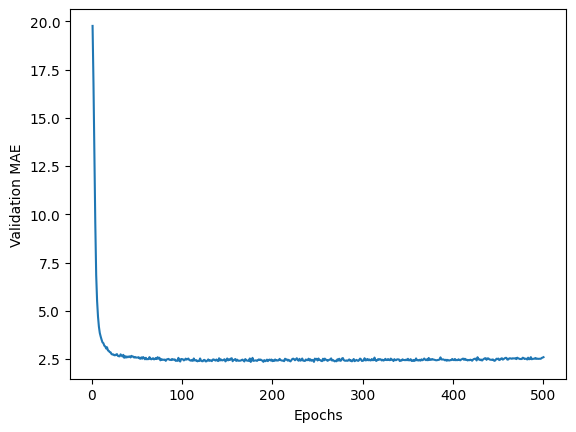

In [187]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

##  CONCLUSIONS

Use this area to write your conclusions, lessons learned, etc.

**IMDB Dataset**

We looked into the binary categorization of movie reviews using the IMDB dataset. Tokenizing the text and converting it into sequences were part of the preprocessing the data, which is where we began. Next, we built a neural network model with an embedding layer and a dense final layer with sigmoid activation for binary classification.

Lesson Learned
*   Preprocessing data is essential
*   Word representations are captured by embedding layers.
*   Appropriate metrics are necessary for model evaluation
*   Regularisation strategies can be used to deal with overfitting.


**Reuters Dataset**

We looked into the multiclass classification of newswires using the Reuters dataset. We started by preprocessing the data by tokenizing the text, converting it into sequences, and one-hot encoding the labels. We then built a neural network model using an embedding layer, LSTM layers, and a dense layer with softmax activation for multiclass classification.

Lesson Learned

*   Data preprocessing is crucial.
*   Layers used for embedding take semantic representations.
*   Metrics for multiclass evaluation are required.

**Boston Housing Price dataset**

Using the dataset for Boston Housing Prices, we investigated the regression task. We created a regression model to forecast property values depending on many characteristics, such as the crime rate and the number of rooms etc.

Lesson Learned
*   Preprocessing data is essential.
*   It's crucial to choose features.
*   Evaluation metrics for regression are importatnt